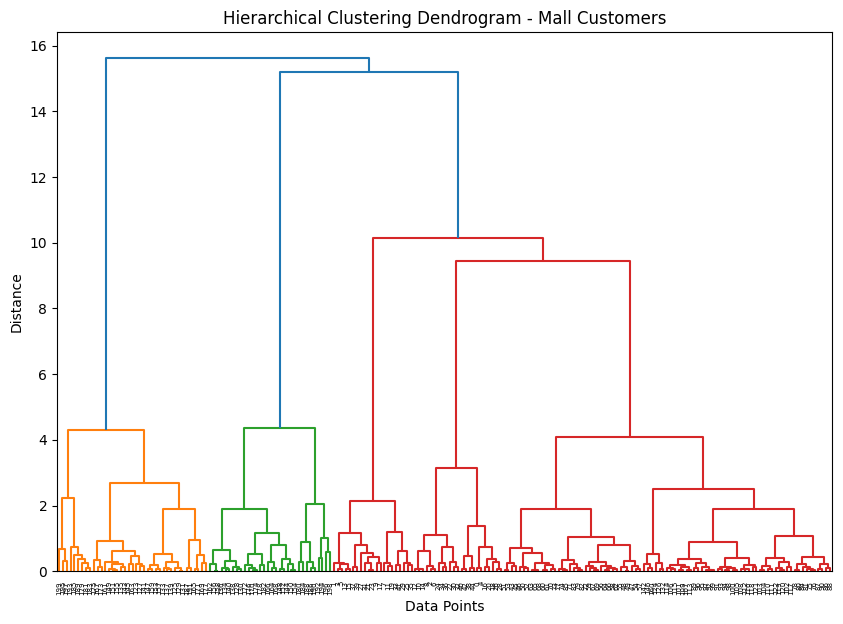

Mall Customers Clustering Results:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        3
1                  15                      81        3
2                  16                       6        3
3                  16                      77        3
4                  17                      40        3


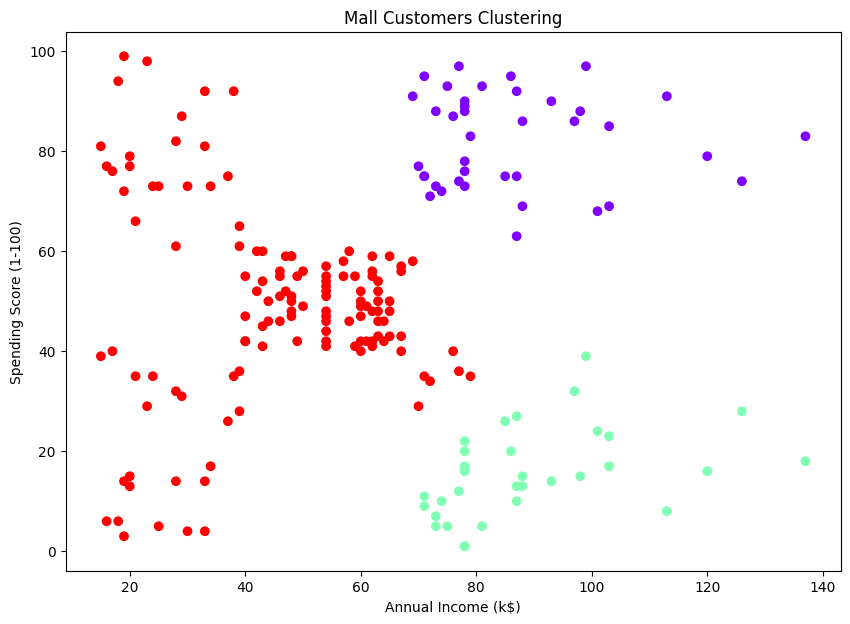

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('Mall_Customers.csv')

# Select features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Mall Customers')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to form flat clusters
n_clusters = 3  # You can adjust the number of clusters
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

# Add cluster labels to the original data
data['Cluster'] = cluster_labels

# Display results
print("Mall Customers Clustering Results:")
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

# Visualize clusters
plt.figure(figsize=(10, 7))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=cluster_labels, cmap='rainbow')
plt.title('Mall Customers Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


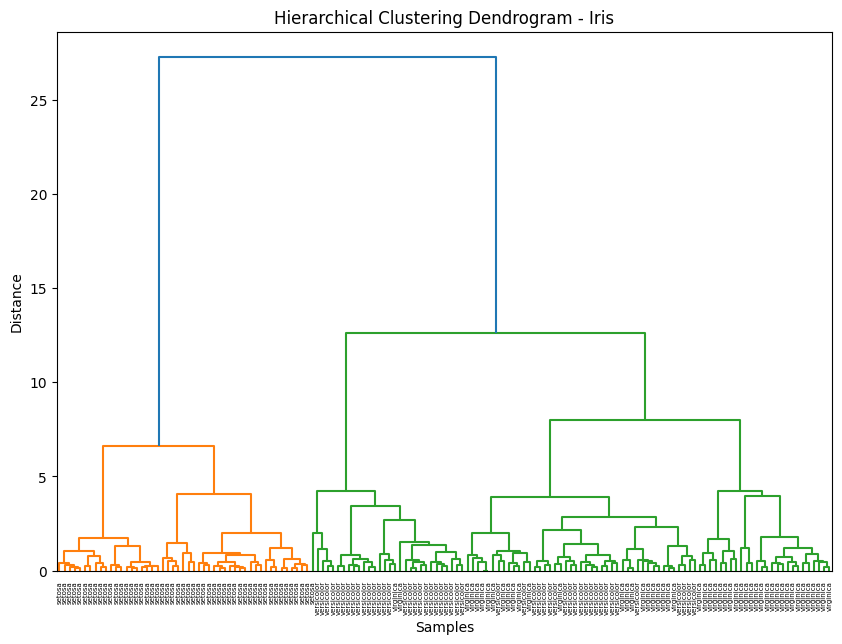

Iris Clustering Results:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


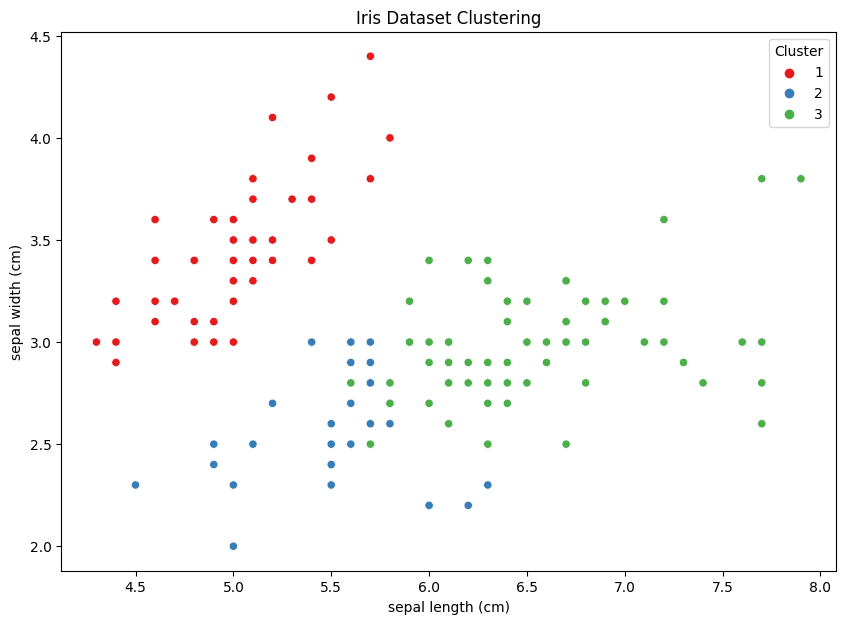

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
target = iris.target

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform hierarchical clustering
linkage_matrix = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=iris.target_names[target])
plt.title("Hierarchical Clustering Dendrogram - Iris")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Cut the dendrogram to form flat clusters
n_clusters = 3  # Set desired number of clusters
cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Add cluster labels to the original data
iris_df = pd.DataFrame(data, columns=feature_names)
iris_df['Cluster'] = cluster_labels

# Display results
print("Iris Clustering Results:")
print(iris_df.head())

# Visualize clusters (using first two features for simplicity)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=iris_df[feature_names[0]], y=iris_df[feature_names[1]], hue=iris_df['Cluster'], palette='Set1')
plt.title('Iris Dataset Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(title='Cluster')
plt.show()
